# Scenario: 
By analyzing text data, we can find meaningful insights from non-numeric data that
can help us achieve our objective. With the help of NLP and its concepts, we can do it. Twitter is
one of the biggest platforms that people use to write their messages, express their feelings
about a particular topic, and share knowledge in the form of text. By analyzing text data, we can
make good decisions for different use cases like judging the sentiment of the human tweets, and
any product review/comments can tell us the performance of a product in the market.
NLP allows us to study and understand the colinearity of the data. So we can predict our objective.
# Objective:
 Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for
data visualization and EDA tasks, NLTK to extract and analyze the information, Sklearn for model
building and performance visualization, to predict our different categories of people’s mindsets.
Dataset description: The data contain information about many Tweets in the form of text and
their types, as mentioned below.
Tweets: Data is in the form of a sentence written by individuals.
category: Numeric(0: Neutral, -1: Negative, 1: Positive) (It is our dependent variable)

**# The following tasks are to be performed:**
• Read the Data from the Given excel file.
• Change our dependent variable to categorical. ( 0 to “Neutral,” -1 to “Negative”, 1 to
“Positive”)
• Do Missing value analysis and drop all null/missing values
• Do text cleaning. (remove every symbol except alphanumeric, transform all words to
lower case, and remove punctuation and stopwords )
• Create a new column and find the length of each sentence (how many words they
contain)
• Split data into dependent(X) and independent(y) dataframe
• Do operations on text data 


# Hints:
o Do one-hot encoding for each sentence (use TensorFlow)
o Add padding from the front side (use Tensorflow)
o Build an LSTM model and compile it (describe features, input length, vocabulary
size, information drop-out layer, activation function for output, )
o Do dummy variable creation for the dependent variable
o split the data into tests and train
• Train new model
• Normalize the prediction as same as the original data(prediction might be in decimal, so
whoever is nearest to 1 is predicted as yes and set other as 0)
• Measure performance metrics and accuracy
• print Classification report

importing required modules

In [ ]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout,Conv1D,MaxPooling1D,GlobalMaxPooling1D,LSTM

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import string
string.punctuation
from nltk.corpus import stopwords

In [ ]:
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

fetching data for analysis

In [ ]:
!wget https://www.dropbox.com/s/il7t10xfzymz8yg/Twitter_Data.csv

--2022-08-20 02:47:40--  https://www.dropbox.com/s/il7t10xfzymz8yg/Twitter_Data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/il7t10xfzymz8yg/Twitter_Data.csv [following]
--2022-08-20 02:47:40--  https://www.dropbox.com/s/raw/il7t10xfzymz8yg/Twitter_Data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce30289f7df3452f5315af5b21c.dl.dropboxusercontent.com/cd/0/inline/BrVSosJAIWveGcwN2HLmA7wkFNaXH_f1xy5cTuVNAEIo5Wt1NYXFbg0Hg-24nXEvx4W4B5cNxe9Gmj-9ZgnSXoU8bvgW6dk_SR6tfgrdoU6FqOhTvDABUasf0u3Sk5gmDKG6DFkLMi7s6vgudkyjox7XB1YaVCBtCZF9Xi3eVFSKVQ/file# [following]
--2022-08-20 02:47:40--  https://uce30289f7df3452f5315af5b21c.dl.dropboxusercontent.com/cd/0/inline/BrVSosJAIWveGcwN2HLmA7wkFNaXH_f1xy5cTuVNAEIo5Wt1NYXFbg0H

reading data to csv

In [ ]:
df = pd.read_csv("Twitter_Data.csv")

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


changing dependent variable

In [ ]:
def change_dep(x):
  if(x==0):
    return "Neutral"
  elif(x==1):
    return "Positive"
  else:
    return "Negative"

In [ ]:
df['category']=df.apply(lambda x:change_dep(x['category']),axis=1)

null data handling

In [ ]:
df.isnull().sum()

clean_text    4
category      0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

data preprocessing 

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
for i in range(0,len(df)):
  df['clean_text'][i] =df['clean_text'][i].lower()
  df['clean_text'][i] = re.sub(r"[^a-z0-9]"," ",df['clean_text'][i])

In [ ]:
df

,clean_text,category
0,when modi promised minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162971,why these 456 crores paid neerav modi not reco...,Negative
162972,dear rss terrorist payal gawar what about modi...,Negative
162973,did you cover her interaction forum where she ...,Neutral
162974,there big project came into india modi dream p...,Neutral


In [ ]:
count_of_words=[]

In [ ]:
for i in string.punctuation : 
  df["clean_text"] = df.clean_text.replace(i,'')


In [ ]:
new_text=df["clean_text"]

In [ ]:
en_stop_words = stopwords.words('english')

In [ ]:
for i in range(0,len(df)):
  df["clean_text"][i]=word_tokenize(df["clean_text"][i])

In [ ]:
for i in range(0,len(df)):
  df["clean_text"][i]=[word for word in df["clean_text"][i] if word not in en_stop_words]

In [ ]:
for i in range(0,len(df)):
  for j in range(0,len(df["clean_text"][i])):
    df["clean_text"][i][j]=lemmatizer.lemmatize(df["clean_text"][i][j])

In [ ]:
df["count"]=0
for i in range(0,len(df)):
  df["count"][i]=len(df["clean_text"][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,clean_text,category,count
0,"[modi, promised, minimum, government, maximum,...",Negative,21
1,"[talk, nonsense, continue, drama, vote, modi]",Neutral,6
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",Positive,13
3,"[asking, supporter, prefix, chowkidar, name, m...",Positive,19
4,"[answer, among, powerful, world, leader, today...",Positive,10
...,...,...,...
162971,"[456, crore, paid, neerav, modi, recovered, co...",Negative,13
162972,"[dear, r, terrorist, payal, gawar, modi, killi...",Negative,32
162973,"[cover, interaction, forum, left]",Neutral,4
162974,"[big, project, came, india, modi, dream, proje...",Neutral,9


In [ ]:
X=df.drop(columns=["category","count"])
y=df.category
length=df.count

In [ ]:
voc_size=10000

In [ ]:
df["clean_text"][0][0]

'modi'

In [ ]:
lst=[]
for i in range(0,len(df["clean_text"])):
  new=""
  for j in range(0,len(df["clean_text"][i])):
    new=new+df["clean_text"][i][j]+" "
  lst.append(new) 
      
     


In [ ]:
onehot_rep = [one_hot(words,voc_size) for words in lst]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length = 25
embedded_docs = pad_sequences(onehot_rep, maxlen=sent_length, padding='pre')

In [ ]:
embedded_docs.shape

(162976, 25)

 LSTM model 

In [ ]:
vec_size=300
model=Sequential()
model.add(Embedding(voc_size,vec_size,input_length=sent_length))
model.add(LSTM(units=64))


model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(16,activation="relu"))


model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
y

0         Negative
1          Neutral
2         Positive
3         Positive
4         Positive
            ...   
162971    Negative
162972    Negative
162973     Neutral
162974     Neutral
162975    Positive
Name: category, Length: 162976, dtype: object

In [ ]:
len(y)

162976

In [ ]:
y=pd.get_dummies(y)

train test data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embedded_docs, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(130380, 32596, 130380, 32596)

In [ ]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4075/4075 [==============================] - 26s 6ms/step - loss: 0.2222
Epoch 2/10
4075/4075 [==============================] - 26s 6ms/step - loss: 0.2222
Epoch 3/10
4075/4075 [==============================] - 25s 6ms/step - loss: 0.2222
Epoch 4/10
4075/4075 [==============================] - 26s 6ms/step - loss: 0.2222
Epoch 5/10
4075/4075 [==============================] - 25s 6ms/step - loss: 0.2222
Epoch 6/10
4075/4075 [==============================] - 25s 6ms/step - loss: 0.2222
Epoch 7/10
4075/4075 [==============================] - 25s 6ms/step - loss: 0.2222
Epoch 8/10
4075/4075 [==============================] - 26s 6ms/step - loss: 0.2222
Epoch 9/10
4075/4075 [==============================] - 25s 6ms/step - loss: 0.2222
Epoch 10/10
4075/4075 [==============================] - 25s 6ms/step - loss: 0.2222


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 25, 300)           3000000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                93440     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,096,065
Trainable params: 3,096,065
No

In [ ]:
model.evaluate(X_test, y_test)

1019/1019 [==============================] - 3s 3ms/step - loss: 0.2223


0.22230184078216553

prediction from model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
len(y_pred)

32596

In [ ]:
len(y_test),len(X_test)

(32596, 32596)

In [ ]:
y_pred

array([[0.34217992],
       [0.3421626 ],
       [0.3421415 ],
       ...,
       [0.34214962],
       [0.34216017],
       [0.34218466]], dtype=float32)

In [ ]:
y_test=y_test.drop(columns=["Negative","Neutral"])

In [ ]:
y_test=list(y_test.Positive)

In [ ]:
len(y_test)

32596

In [ ]:
y_pred

array([[0.34217992],
       [0.3421626 ],
       [0.3421415 ],
       ...,
       [0.34214962],
       [0.34216017],
       [0.34218466]], dtype=float32)

In [ ]:
for i in range(0,len(y_pred)):
  if y_pred[i]>y_pred.mean():
    y_pred[i]=1
  elif y_pred[i]==y_pred.mean():
    y_pred[i]=0
  else:
    y_pred[i]=0

In [ ]:
y_pred=y_pred.tolist()

In [ ]:
for i in range(0,len(y_pred)):
  y_pred[i]=int(y_pred[i][0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.5121487299055099

Measure performance metricsand accuracy

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt


[[11815  6275]
 [ 9627  4879]]


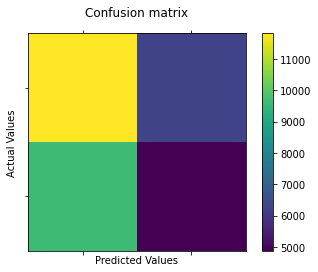

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Classification report

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60     21442
           1       0.34      0.44      0.38     11154

    accuracy                           0.51     32596
   macro avg       0.49      0.49      0.49     32596
weighted avg       0.54      0.51      0.52     32596

